Motivation behinde notebook:
Want to get a feel for data and what part of it we can use. 

From the TA - we need to divide the data set and use NLP to find descbritions that contains mentions about other channels. It can be clever to look at categories that have real relationships, like makeup, gaming videos etc. So there is a real link, and we then can make the network. 

The big challenge to create the smaller data set and find collaboration – like mention. This can be done with NLP, to look for names. To make the dataset smaller, we can use data from 2016-2019, this is part of the dataset where there is not that much data from the time series is missing. There is a long tail of data, so most data are in the later years. 
Tips to work with data: 
Load chunks and write effective code 

He mentions regression analysis, I did not understand what we should use that for?  

Research questions: 
Cofounders – impact effect, pre and post, 
Network – engagement, before and after a collaboration



In [1]:
#First want to load part of the data - like make a random selections of 1000 channels for each year
#Like 1000 random channels from 2017, 2018, 2019 - just to get started.  

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import json
import gzip

In [2]:
# Define the path to your file
file_path = '_raw_df_channels.tsv.gz'
chunk_size = 1000
number_of_samples = 4000
sample_df = pd.DataFrame()
samples_per_year = {2016:0, 2017: 0, 2018: 0, 2019: 0}
sample = []
#Stored as a dictonery, used to store a collection of items that are unordered, 
#changeable, and indexed by keys. In the context of this task, 
#it allows for efficient tracking and updating of the samples taken for each year
# Initialize a dictionary to keep count of the videos per year

# Define the start and end dates
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2019-12-31')

#When you set chunksize=1000, it means that the read_csv function will 
#read the file in segments of 1000 rows at a time, rather than loading the entire file into memory at once. 
#This is particularly useful 
#when dealing with large files, as it allows you to process the file in smaller, more manageable pieces.

# Read the file in chunks
with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    for chunk in pd.read_csv(file, sep='\t', chunksize=chunk_size):
        # Convert the 'join_date' to datetime
        chunk['join_date'] = pd.to_datetime(chunk['join_date'])
        
        # Filter the data by year and check the sample size
        for year in range(2016, 2020):  # 2016, 2017, 2018, 2019
            if year not in samples_per_year:
                samples_per_year[year] = 0  # Initialize if the year is not in the dictionary
            
            # Continue if we already have enough samples for this year
            if samples_per_year[year] >= number_of_samples:
                continue
            
            # Filter the chunk for the current year
            is_current_year = chunk['join_date'].dt.year == year
            current_year_chunk = chunk[is_current_year]
            
            # Calculate how many more samples we need for this year
            samples_needed = number_of_samples - samples_per_year[year]
            current_year_sample = current_year_chunk.head(samples_needed)
            
            # Append the samples to our list of dataframes
            sample.append(current_year_sample)
            
            # Update the count for the current year
            samples_per_year[year] += len(current_year_sample)
            

# Concatenate all the sampled dataframes into one
sample_df = pd.concat(sample, ignore_index=True)
print(f"Total rows collected: {samples_per_year}")

# Now you can work with the sampled DataFrame as you normally would
display(sample_df)

Total rows collected: {2016: 4000, 2017: 4000, 2018: 4000, 2019: 1231}


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
0,Entertainment,2016-08-10,UCgtQ-oP9ulDNf2Ja0-fNB7w,Maha AJ,525000,90,30304.0
1,Entertainment,2016-06-04,UCUINVzfWcJNq8YdxWLLwI8w,Ekhon,40000,127,314708.0
2,People & Blogs,2016-03-28,UC3f-KdUeMwkC6z7IfRJUjPw,Ekim Kaya,80600,345,199579.0
3,Gaming,2016-12-12,UCaOU_kQGERe4WLHIOwAcuQg,ekimbo,46200,19,282355.0
4,People & Blogs,2016-05-02,UCGBvI8xXfyPWVXYRnvbe7rw,Eko Languages,2560000,473,3836.0
...,...,...,...,...,...,...,...
13226,People & Blogs,2019-01-05,UCpQCLMVh_28G9HMzzip95QA,Creations Tips,42000,46,313959.0
13227,Entertainment,2019-03-11,UC0zub6PYy8jdmzkEZUK27ug,Creative Buzz,27900,90,279208.0
13228,People & Blogs,2019-08-21,UCxNzlifS2UPOhoc0_eFjppQ,Florence by Mills,10900,21,675199.0
13229,Entertainment,2019-03-25,UCp_Xw9uKM8W8vezWcAz3UQQ,Karuma Say,33000,26,244670.0


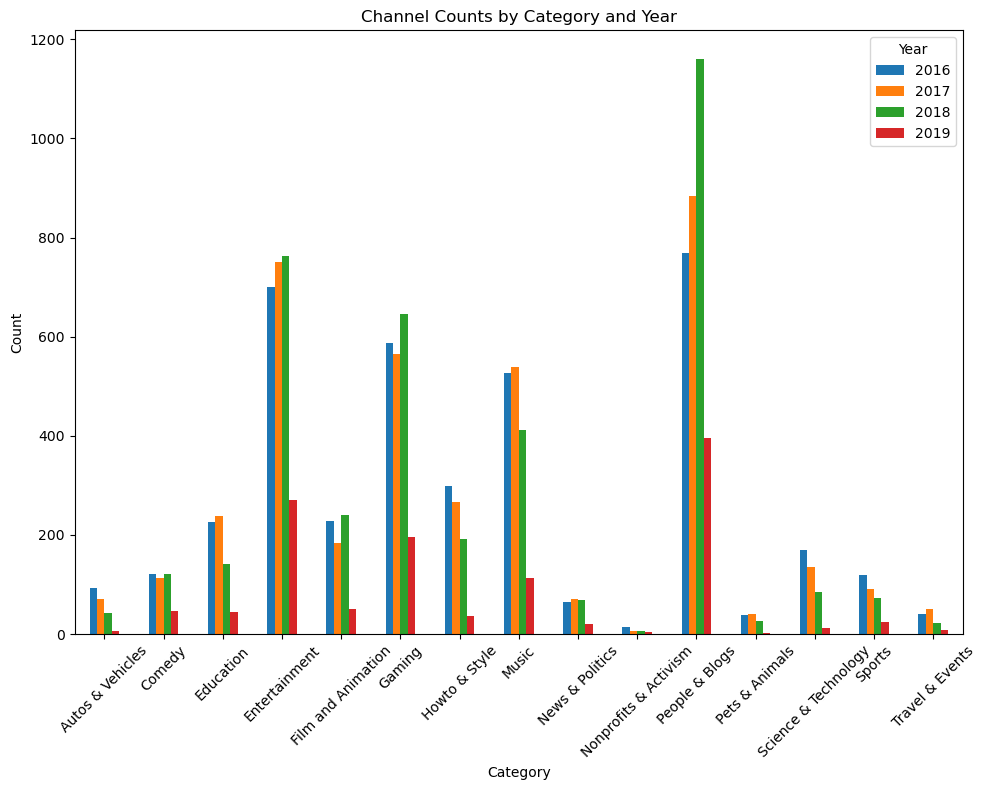

In [3]:
#Want to make a plot of different categories, for each of the three years along the x-axis, and the y, is the count. 
#And make a plot over the distributions of subscribers_cc

# First, we'll add a 'year' column to our DataFrame
sample_df['year'] = sample_df['join_date'].dt.year

# Now, group by 'category_cc' and 'year' and count the number of occurrences
category_counts = sample_df.groupby(['category_cc', 'year']).size().unstack(level=1)

# Plot the data
category_counts.plot(kind='bar', figsize=(10, 8))
plt.title('Channel Counts by Category and Year')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate category labels if they overlap
plt.legend(title='Year')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

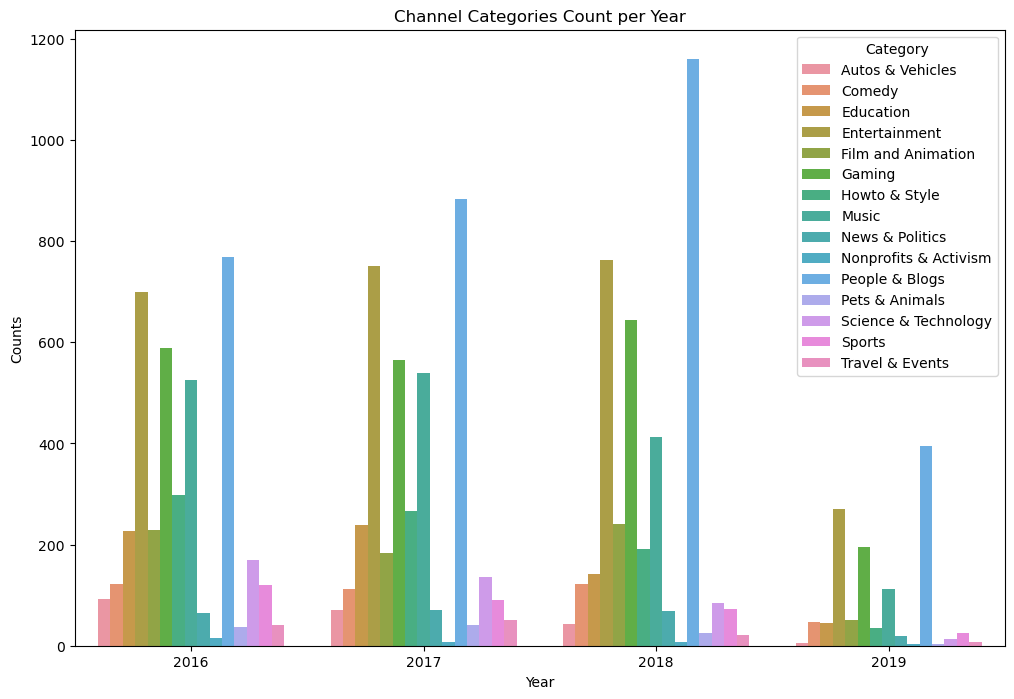

In [4]:
# First, ensure 'join_date' is a datetime object
sample_df['join_date'] = pd.to_datetime(sample_df['join_date'])

# Extract the year from 'join_date' and create a new column for it
sample_df['year'] = sample_df['join_date'].dt.year

# Group by 'year' and 'category_cc', and then get the size of each grouping
category_counts = sample_df.groupby(['year', 'category_cc']).size().reset_index(name='counts')

# Now, plot the results with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='counts', hue='category_cc', data=category_counts)

plt.title('Channel Categories Count per Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(title='Category')
plt.show()

In [12]:
#How much overlap are there between the years, how many channles are in all years. 

# Ensure 'datetime' is a datetime object and extract the year
sample_df['year'] = pd.to_datetime(sample_df['join_date']).dt.year

# Group by 'channel' and count unique 'year' occurrences
channel_year_count = sample_df.groupby('channel')['year'].nunique()

# Filter channels that are present in all four years
channels_all_years = channel_year_count[channel_year_count == 4]

# Display the result
print(f"Number of channels represented in all four years: {len(channels_all_years)}")
print("These channels are:", channels_all_years.index.tolist())

# Group by 'channel' and 'year' and count occurrences
channel_year_overlap = sample_df.groupby(['channel', 'year']).size().reset_index(name='count')

# Count how many different years each channel appears in
channel_overlap_count = channel_year_overlap.groupby('channel').size()

# Channels appearing in only one year have no overlap, so we filter them out
overlap_channels = channel_overlap_count[channel_overlap_count > 1]

# Display the number of channels that have overlap between years
print(f"Number of channels with overlap across years: {len(overlap_channels)}")

# Display a summary showing the overlap details
overlap_summary = channel_year_overlap[channel_year_overlap['channel'].isin(overlap_channels.index)]
print(overlap_summary)

Number of channels represented in all four years: 0
These channels are: []
Number of channels with overlap across years: 0
Empty DataFrame
Columns: [channel, year, count]
Index: []


In [5]:
#Whant to extract the three categories with real connections and that has a high number of videos
#I selected: 'Education', 'Gaming', 'People & Blogs'. 
#Then i will use this three categories to collect from the raw_df_timeseries in the periode 2016-2019. 

# Define the path to your file
file_path = '_raw_df_timeseries.tsv.gz'
chunk_size = 10000
number_of_samples_per_year = 10000
column_name = 'datetime'
categories_to_include = ['Education', 'Gaming', 'People & Blogs']

def collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories):
    sample_df = pd.DataFrame()
    samples_per_year = {2016: 0, 2017: 0, 2018: 0, 2019: 0}
    sample = []

    # Read the file in chunks
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for chunk_index, chunk in enumerate(pd.read_csv(file, sep='\t', chunksize=chunk_size)):
            print(f"Processing chunk {chunk_index+1}...")
            chunk[column_name] = pd.to_datetime(chunk[column_name])

            # Filter the chunk for the specified categories
            chunk = chunk[chunk['category'].isin(categories)]

            # Filter the data by year and check the sample size
            for year in samples_per_year.keys():
                if samples_per_year[year] >= number_of_samples_per_year:
                    continue

                # Filter the chunk for the current year
                is_current_year = chunk[column_name].dt.year == year
                current_year_chunk = chunk[is_current_year]

                # Calculate how many more samples we need for this year
                samples_needed = number_of_samples_per_year - samples_per_year[year]
                current_year_sample = current_year_chunk.head(samples_needed)

                # Append the samples to our list of dataframes
                sample.append(current_year_sample)

                # Update the count for the current year
                samples_per_year[year] += len(current_year_sample)

            # If we've collected enough samples for all years, we can break early
            if all(count >= number_of_samples_per_year for count in samples_per_year.values()):
                break

    # Concatenate all the sampled dataframes into one
    sample_df = pd.concat(sample, ignore_index=True)
    print(f"Total rows collected: {samples_per_year}")
    return sample_df

# Now you can call your function and display the results
sampled_timeseries_df = collection_of_data(file_path, chunk_size, number_of_samples_per_year, column_name, categories_to_include)
display(sampled_timeseries_df.sort_values(by='datetime'))

Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing chunk 30...
Total rows collected: {2016: 10000, 2017: 10000, 2018: 10000, 2019: 10000}


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
33143,UCiSYcRtgXjXioBYMvOem8Lw,People & Blogs,2016-01-11 00:00:00,1.271166e+05,0.000000,90.125000,0.000000,23,0,0
33144,UCiSYcRtgXjXioBYMvOem8Lw,People & Blogs,2016-01-18 00:00:00,5.676875e+04,0.000000,92.000000,1.875000,23,0,0
35473,UCdq-UwjMaS4BTvLdnxadkbw,Gaming,2016-01-25 00:00:00,1.039532e+06,1212.250000,1219.375000,0.000000,101,0,0
33145,UCiSYcRtgXjXioBYMvOem8Lw,People & Blogs,2016-01-25 00:00:00,5.979512e+04,3026.375000,92.250000,0.250000,23,0,0
35474,UCdq-UwjMaS4BTvLdnxadkbw,Gaming,2016-02-01 00:00:00,1.048018e+06,8485.750000,1236.000000,16.625000,101,0,0
...,...,...,...,...,...,...,...,...,...,...
25688,UCzP-NeZGFOp44-2EpuRtO8Q,People & Blogs,2019-09-23 01:00:00,1.402016e+07,127882.406994,230297.619048,1372.353423,85,1,1
12593,UCW_TXyufamt-ByN704ks_4g,People & Blogs,2019-09-23 01:00:00,2.899329e+06,267445.572917,17475.000000,1305.913194,69,7,16
18896,UCtEBCLo0Yr3HqCrvmNRRmwg,Gaming,2019-09-23 01:00:00,9.784359e+06,359988.310606,69016.666667,2422.039773,87,0,1
20867,UCWkt9bXS_KFatTCeyZJEjCw,Education,2019-09-23 01:00:00,8.945332e+05,7707.544444,17058.333333,107.255556,134,2,4


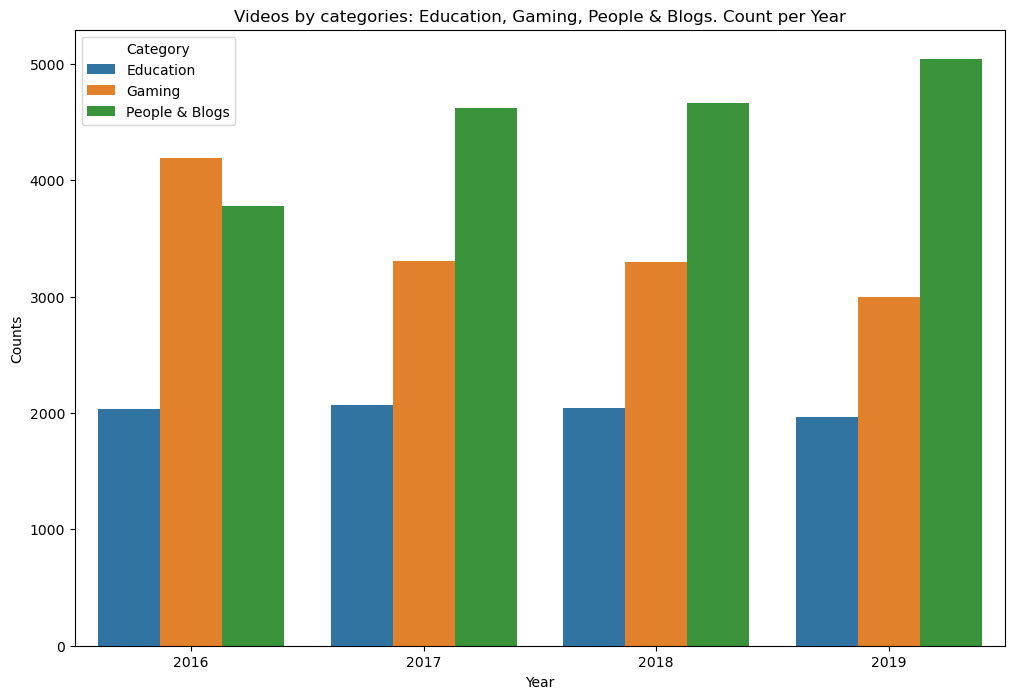

In [6]:
#Want to plot the distributions of views in each category 
sampled_timeseries_df
# First, ensure 'join_date' is a datetime object
sampled_timeseries_df['datetime'] = pd.to_datetime(sampled_timeseries_df['datetime'])

# Extract the year from 'join_date' and create a new column for it
sampled_timeseries_df['year'] = sampled_timeseries_df['datetime'].dt.year

# Group by 'year' and 'category_cc', and then get the size of each grouping
category_counts = sampled_timeseries_df.groupby(['year', 'category']).size().reset_index(name='counts')

# Now, plot the results with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='counts', hue='category', data=category_counts)
plt.title('Videos by categories: Education, Gaming, People & Blogs. Count per Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(title='Category')
plt.show()

The hard thing for us is that we can not use the fether.file, since to look at mentions of collabirations, we need to go into the descrbitions and the tags. 

I am planing to load the same videos as in the sampled_timeseries_df. I need to see how much overlap there is between the first sample_df with the channels and the sampled_timeseries_df. Like which of the channels are represented. 


In [7]:
#Need to plot what percentage of channels that are represented in each of the videos in the second dataframe. 
#So i need to extract "channel" from sample_df(only channel information, has video_cc") and compere it 
#with the sampled_timeseries_df(only video information,with "channel")  
#In sample_df i have channels across different categories, but in sampled_timeseries_df i only have videoes from the three categories. 

In [8]:
# Step 1: Get unique channels
unique_channels_sample = set(sample_df['channel'].unique())
unique_channels_timeseries = set(sampled_timeseries_df['channel'].unique())

# Step 2: Find intersection
common_channels = unique_channels_sample.intersection(unique_channels_timeseries)

# Step 3: Calculate percentages
percentage_of_sample_channels_in_timeseries = (len(common_channels) / len(unique_channels_sample)) * 100

# Display the percentage
print(f"{percentage_of_sample_channels_in_timeseries:.2f}% of channels from sample_df are represented in sampled_timeseries_df.")


0.93% of channels from sample_df are represented in sampled_timeseries_df.


In [14]:
file_path = "C:\\Users\\Bruker\\Downloads\\yt_metadata_en.jsonl.gz"
chunk_size = 10000
number_of_samples_per_year = 5000
categories_to_include = ['Education', 'Gaming', 'People & Blogs']

def collection_of_data(file_path, chunk_size, number_of_samples_per_year, categories):
    sample_df = pd.DataFrame()
    samples_per_year = {2016: 0, 2017: 0, 2018: 0, 2019: 0}
    sample = []

    # Read the file in chunks
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for chunk_index, chunk in enumerate(pd.read_json(file, lines=True, chunksize=chunk_size)):
            print(f"Processing chunk {chunk_index+1}...")
            chunk['upload_date'] = pd.to_datetime(chunk['upload_date'])

            # Filter the chunk for the specified categories
            chunk = chunk[chunk['categories'].isin(categories)]

            # Filter the data by year and check the sample size
            for year in samples_per_year.keys():
                if samples_per_year[year] >= number_of_samples_per_year:
                    continue

                # Filter the chunk for the current year
                is_current_year = chunk['upload_date'].dt.year == year
                current_year_chunk = chunk[is_current_year]

                # Calculate how many more samples we need for this year
                samples_needed = number_of_samples_per_year - samples_per_year[year]
                current_year_sample = current_year_chunk.head(samples_needed)

                # Append the samples to our list of dataframes
                sample.append(current_year_sample)

                # Update the count for the current year
                samples_per_year[year] += len(current_year_sample)

            # If we've collected enough samples for all years, we can break early
            if all(count >= number_of_samples_per_year for count in samples_per_year.values()):
                break

    # Concatenate all the sampled dataframes into one
    sample_df = pd.concat(sample, ignore_index=True)
    print(f"Total rows collected: {samples_per_year}")
    return sample_df

# Now you can call your function and display the results
sampled_metadata_df = collection_of_data(file_path, chunk_size, number_of_samples_per_year, categories_to_include)
display(sampled_metadata_df.sort_values(by='upload_date'))

Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Total rows collected: {2016: 5000, 2017: 5000, 2018: 5000, 2019: 5000}


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
12127,Gaming,UCzSSh5jrMe1xyGe9t9aADYQ,2019-11-14 16:28:56.182261,I was pretty well into a number of drinks when...,0.0,ZAJ9kqwVYlY,3925,1.0,"New Year,2016,street fighter 4,gta 4,xbox 360,...",Happy New Year 2016 Gaming Montage/Stream,2016-01-01,44
96,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:29:00.852328,Play all my games at http://www.retrogamer3.co...,8.0,E0BOdbOQOXM,1397,85.0,"video,games,retrogamer3,ed,findlay,etf,films,t...",Happy New Year! Top Games of 2015,2016-01-01,1410
17974,People & Blogs,UCzQkHmgrUMpZ7cCqttg9cPQ,2019-11-05 03:17:49.940832,https://www.rahulinnovations.com/ honor 4x lol...,3.0,_CEAD5FsLoo,20,0.0,"honor 4x,lollipop update,honor 4x update lolli...",Honor 4x Lollipop Update Downloading Faster Trick,2016-01-01,445
15655,People & Blogs,UCzRrheyUCB_qUrrfQ_sEG-Q,2019-11-04 14:48:23.230719,"Use coupon code ""HUTCH"" for 10% of Lootcrate: ...",15.0,wh9YIhJPH7g,876,1789.0,"hutch,theimightyhutch,hutchisy0daddy,hutchisyo...",A F***ING MINEFIELD (Blitz Chess),2016-01-01,62217
6396,Gaming,UCzV3Xt_qXi8KaaBR58q-qFg,2019-11-02 04:16:31.615251,Support Dansg08 on Patreon: www.patreon.com/da...,2.0,OER8f30mrhE,1788,62.0,"mgsv,mgs5,metal gear solid 5,metal gear solid ...",Metal Gear Solid 5: The Phantom Pain - Walkthr...,2016-01-01,1560
...,...,...,...,...,...,...,...,...,...,...,...,...
11663,Gaming,UCzTB8EBVJWkzJi2sQjdBv9g,2019-11-14 05:56:00.879718,"More changes added to No Man's Sky patch 2.13,...",6.0,tM-SCzdY83I,307,323.0,"More Changes Added To No Man's Sky Patch 2.13,...",More Changes Added To No Man's Sky Patch 2.13 ...,2019-10-02,8262
17786,People & Blogs,UCzR2KZSRI-bxDR9FwfJFQvQ,2019-11-17 13:01:33.234353,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n♡INSTAGRAM♡ ...,19.0,3U3cFl33M98,1334,475.0,"Girl talk,How to deal with African in laws,how...","My Mother in Law Hates me, throw punches at me...",2019-10-02,14362
19079,Gaming,UCzPqhsWkyHNYq2370bxoHow,2019-11-02 14:38:02.445015,"dekho new video, karo enjoy , rabb rakha ...\n...",18.0,O-ak7Q6nqCc,521,1080.0,"PUNJabi,indian games,pubg india,live brartv,br...",CRAZY 12 KILLS GAMEPLAY | PUBG PUNJAB WALE,2019-10-03,11404
16577,Education,UCzRvs4DoFFk2xsJNYahQJUg,2019-10-29 21:05:29.239795,सिंगल पीस के लिए :-\n\nElectronic Led Mosquito...,144.0,EvBlbDCeAfo,728,2097.0,"smart gadgets wholesale market,amazon hot sell...",जबरदस्त डिमांड है Amazon New Smart Top Trendin...,2019-10-03,82242


In [17]:
# Step 1: Get unique channels
unique_channels_sample = set(sampled_metadata_df['channel_id'].unique())
unique_channels_timeseries = set(sampled_timeseries_df['channel'].unique())

# Step 2: Find intersection
common_channels = unique_channels_sample.intersection(unique_channels_timeseries)

# Step 3: Calculate percentages
percentage_of_sample_channels_in_timeseries = (len(common_channels) / len(unique_channels_sample)) * 100

# Display the percentage
print(f"{percentage_of_sample_channels_in_timeseries:.6f}% of channels from sample_df are represented in sampled_timeseries_df.")


0.000000% of channels from sample_df are represented in sampled_timeseries_df.
